${\Large Вариант 12}$

# 1.1 По выборкам вычислить слудующие точечные оценки: матожидание; дисперсию; среднеквадратичное отклонение; начальные и центральные моменты до 4-го порядка включительно; коэффициенты асимметрии; медиану; эксцесс.

In [1]:
library("readxl")
options(warn=-1)
options(digits=2)

Warning message:
"пакет 'readxl' был собран под R версии 4.1.3"


## Считывание данных из xlsx-файла и приведение к числовому формату

In [2]:
DATA <- as.data.frame(read_excel('data.xlsx'))
DATA[, 2:7] <- lapply(DATA[,2:7], as.numeric)

## Расчет дисперсии

In [3]:
DATA <- na.omit(DATA)
round(apply(X = DATA[2:7], MARGIN = 2, FUN = sd), 4)

incidence     retail   students pensioners      uempl     income 
       137      32252        147         36         46       5075

## Расчет среднеквадратичного отклонения

In [4]:
round(apply(X = DATA[2:7], MARGIN = 2, FUN = var), 4)

incidence     retail   students pensioners      uempl     income 
   1.9e+04    1.0e+09    2.2e+04    1.3e+03    2.1e+03    2.6e+07

## Расчет математического ожидания

In [5]:
round(apply(X = DATA[2:7], MARGIN = 2, FUN = mean), 4)

incidence     retail   students pensioners      uempl     income 
       785      92627         96        286         73      15345

## Расчет начальных моментов 1-4 порядков

In [7]:
#install.packages("moments")
library("moments")
df <- data.frame(Moments = seq(0, 4))
for (i in 2:7){
        df <- cbind(df, all.moments(DATA[, i], order.max = 4, central = FALSE))
}
colnames(df) <- c("Moments", colnames(DATA[, 2:7]))
df <- df[-1,]
df

Устанавливаю пакет в 'C:/Users/sunch/Documents/R/win-library/4.1'
(потому что 'lib' не определено)



package 'moments' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sunch\AppData\Local\Temp\RtmpQTkega\downloaded_packages


,Moments,incidence,retail,students,pensioners,uempl,income
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1,7.9e+02,9.3e+04,9.6e+01,2.9e+02,7.3e+01,1.5e+04
3,2,6.3e+05,9.6e+09,3.1e+04,8.3e+04,7.4e+03,2.6e+08
4,3,5.3e+08,1.1e+15,2.5e+07,2.4e+07,9.4e+05,5.2e+12
5,4,4.5e+11,1.6e+20,2.7e+10,7.3e+09,1.4e+08,1.2e+17


## Расчет центральных моментов 1-4 порядков

In [8]:
df1 <- data.frame(Moments = seq(0, 4))
for (i in 2:7){
        df1 <- cbind(df1, all.moments(DATA[, i], order.max = 4, central = TRUE))
}
colnames(df1) <- c("Moments", colnames(DATA[, 2:7]))
df1 <- df1[-1,]
df1

,Moments,incidence,retail,students,pensioners,uempl,income
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1,-4.7e-14,-8.3e-13,-1.7e-15,1.7e-14,-2.4e-15,-4.2e-13
3,2,1.8e+04,1.0e+09,2.1e+04,1.3e+03,2.1e+03,2.5e+07
4,3,-1.0e+06,5.4e+13,1.8e+07,-2.9e+04,9.7e+04,3.8e+11
5,4,1.1e+09,1.0e+19,1.9e+10,6.1e+06,1.4e+07,1.0e+16


## Расчет коэффициента асимметрии

In [9]:
round(kurtosis(DATA[,2:7]), 4)

incidence     retail   students pensioners      uempl     income 
       3.3        9.8       41.5        3.7        3.1       16.0

## Расчет медианы

In [10]:
apply(DATA[,2:7], 2, median)

incidence     retail   students pensioners      uempl     income 
       800      87813         54        288         52      14312

## Расчет коэффициента эксцесса

In [11]:
round(skewness(DATA[,2:7]), 4)

incidence     retail   students pensioners      uempl     income 
     -0.40       1.63       5.76      -0.64       1.00       2.95

# 1.2 Построить для группированной выборки (разбиваем выборку на 10 частей) гистограмму, полигон частот и эмпирическую функцию распределения.

## Построение диаграммы и полигона относительных частот

List of 6
 $ breaks  : num [1:11] 400 468 536 603 671 ...
 $ counts  : int [1:10] 2 1 5 3 13 14 15 11 2 4
 $ density : num [1:10] 0.000421 0.000211 0.001053 0.000632 0.002739 ...
 $ mids    : num [1:10] 434 502 570 637 705 ...
 $ xname   : chr "DATA$incidence"
 $ equidist: logi TRUE
 - attr(*, "class")= chr "histogram"


[1] 1

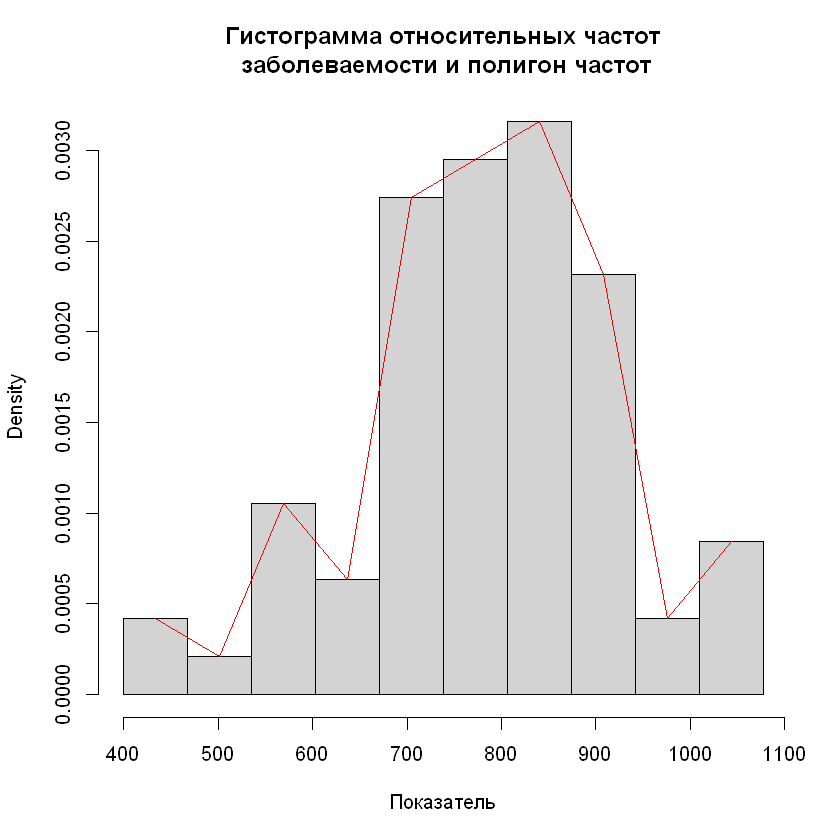

In [12]:
h <- (max(DATA$incidence) - min(DATA$incidence))/10
br <- seq(min(DATA$incidence), max(DATA$incidence), h)
h1 <- hist(DATA$incidence, breaks = br, 
           main = "Гистограмма относительных частот\n заболеваемости и полигон частот",
           xlab = "Показатель",
        freq = FALSE)
lines(h1$density ~ h1$mids, col = "red")
str(h1)
sum(h1$density * h)

## Построение эмпирической функции распределения

In [13]:
counts <- c(h1$counts[1])
for (i in 2:10){
        counts <- c(counts, counts[i - 1] + h1$counts[i])
}

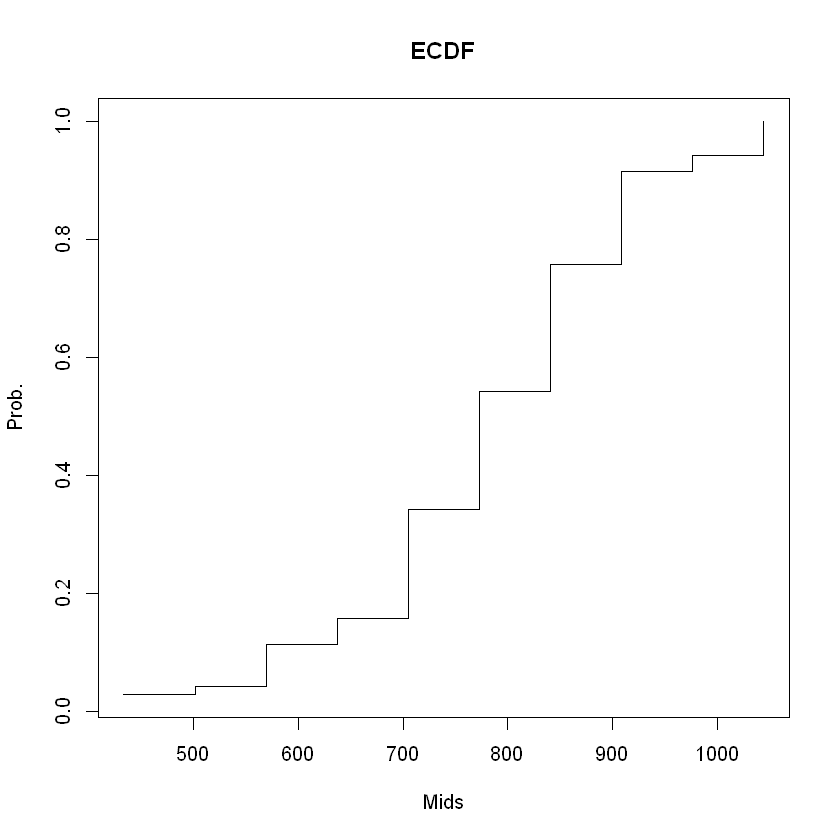

In [14]:
plot(sort(h1$mids), counts/70, type = 's', xlab = 'Mids', ylab = 'Prob.', main = 'ECDF')

## 1.3 Построить доверительные интервалы для математического ожидания (доверительная вероятность p=0,95 и p=0,99)


In [15]:
install.packages('DescTools')

Устанавливаю пакет в 'C:/Users/sunch/Documents/R/win-library/4.1'
(потому что 'lib' не определено)



package 'DescTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sunch\AppData\Local\Temp\RtmpQTkega\downloaded_packages


In [16]:
R.version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          4                           
minor          1.2                         
year           2021                        
month          11                          
day            01                          
svn rev        81115                       
language       R                           
version.string R version 4.1.2 (2021-11-01)
nickname       Bird Hippie                 

In [17]:
library(DescTools)

In [23]:
round(MeanCI(DATA$incidence, conf.level = 0.95), 3)
round(MeanCI(DATA$incidence, conf.level = 0.99), 3)

mean lwr.ci upr.ci 
   785    753    818

mean lwr.ci upr.ci 
   785    742    828

In [24]:
round(MeanCI(DATA$retail, conf.level = 0.95), 3)
round(MeanCI(DATA$retail, conf.level = 0.99), 3)

mean lwr.ci upr.ci 
 92627  84937 100318

mean lwr.ci upr.ci 
 92627  82416 102839

In [25]:
round(MeanCI(DATA$pensioners, conf.level = 0.95), 3)
round(MeanCI(DATA$pensioners, conf.level = 0.99), 3)

mean lwr.ci upr.ci 
   286    277    294

mean lwr.ci upr.ci 
   286    274    297

In [26]:
round(MeanCI(DATA$uempl, conf.level = 0.95), 3)
round(MeanCI(DATA$uempl, conf.level = 0.99), 3)

mean lwr.ci upr.ci 
    73     62     84

mean lwr.ci upr.ci 
    73     58     87

In [27]:
round(MeanCI(DATA$income, conf.level = 0.95), 3)
round(MeanCI(DATA$income, conf.level = 0.99), 3)

mean lwr.ci upr.ci 
 15345  14135  16556

mean lwr.ci upr.ci 
 15345  13739  16952